In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import statistics as st
import matplotlib.pyplot as plt
from matplotlib import style
import pandas_datareader.data as web
import seaborn as sns
style.use('seaborn-dark-palette')
from scipy.stats import mstats
from matplotlib import ticker as mtick

In [2]:
df = pd.read_csv(
    'hdqtrs.csv', 
    parse_dates = True, 
    index_col = 1, 
    na_values = [""]
)
df.head()

,gvkey,fyear,tic,conm,revt,state
datadate,,,,,,
2020-05-31,1004,2019,AIR,AAR CORP,2089.300,IL
2019-12-31,1045,2019,AAL,AMERICAN AIRLINES GROUP INC,45768.000,TX
2019-12-31,1050,2019,CECE,CECO ENVIRONMENTAL CORP,341.869,TX
2019-11-30,1062,2019,ASA,ASA GOLD AND PRECIOUS METALS,2.371,CA
2019-11-30,1062,2019,ASA,ASA GOLD AND PRECIOUS METALS,96.128,CA


In [3]:
idx = df["state"]
u = idx.unique()
print(u)

['IL' 'TX' 'CA' 'AZ' 'UT' 'MA' 'ON' 'CT' 'FL' 'PA' 'NC' 'AL' 'WA' 'HI'
 'NJ' 'NY' 'NV' 'GA' 'ID' 'OH' 'MN' 'WI' 'VT' 'AR' 'CO' 'IA' 'QC' 'KY'
 'RI' 'AB' 'IN' 'PR' 'VA' 'NE' 'SD' 'MO' 'BC' 'KS' 'LA' 'DE' 'MI' 'OK'
 'TN' 'DC' 'MS' 'MD' 'ND' 'WV' 'NS' 'OR' 'NH' 'NM' 'SC' 'MT' 'ME' 'NF'
 'MB' 'SK' 'VI' 'AK' 'NB' 'WY' 'GU']


In [4]:
k = len(df.index)
print(k)

7359


In [5]:
ct = [0] * len(u)

for i in range(k):
    for j in range(len(u)):
        if df.state[i] == u[j]:
            ct[j] = ct[j] + 1
print(ct)

[234, 557, 908, 77, 50, 336, 565, 106, 268, 294, 125, 29, 109, 19, 216, 643, 73, 135, 15, 184, 90, 85, 7, 21, 158, 38, 159, 35, 14, 227, 95, 11, 173, 23, 11, 73, 487, 33, 45, 23, 106, 42, 81, 20, 21, 108, 13, 17, 24, 30, 20, 9, 33, 9, 19, 4, 23, 12, 3, 5, 5, 2, 2]


In [6]:
df1 = pd.DataFrame()
df1['State'] = u
df1['Count'] = ct
df1.head()

,State,Count
0,IL,234
1,TX,557
2,CA,908
3,AZ,77
4,UT,50


In [7]:
df1.set_index("State", inplace = True)
df1 = df1.sort_values(["State"])
print(df1.head())

       Count
State       
AB       227
AK         5
AL        29
AR        21
AZ        77


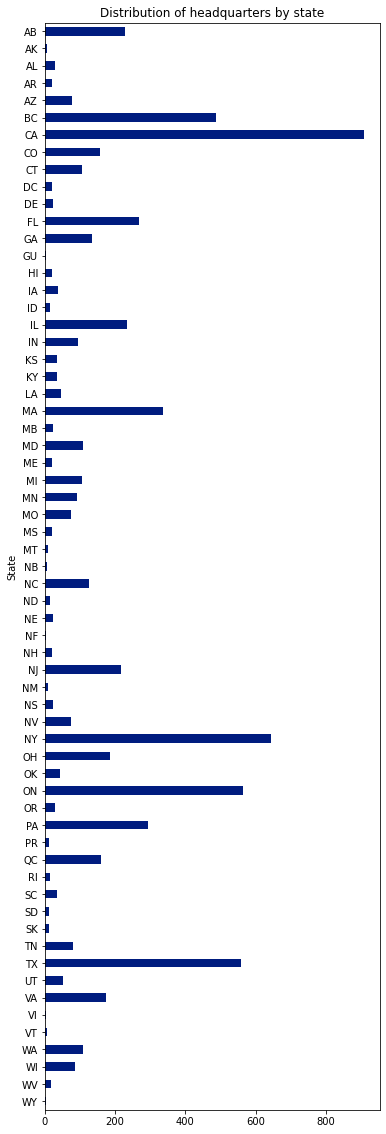

In [8]:
# Basic Plot
df1.plot.barh(legend = False, figsize = (6,20))
plt.gca().invert_yaxis()
plt.title("Distribution of headquarters by state")
plt.show()

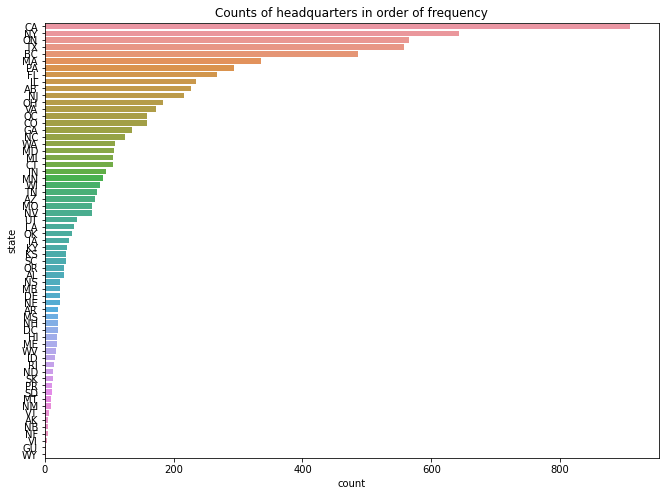

In [9]:
# Countplot

fig = plt.gcf()
fig.set_size_inches(11,8)

sns.countplot(y="state",data = df, order = (df["state"].value_counts()).index)
plt.title("Counts of headquarters in order of frequency")
plt.show()

state
AB     1549.461370
AK      159.497200
AL     1428.040069
AR    29269.858762
AZ     1938.941299
          ...     
VT      134.192286
WA     6925.215945
WI     1813.075047
WV      372.634765
WY        0.000000
Name: revt, Length: 63, dtype: float64


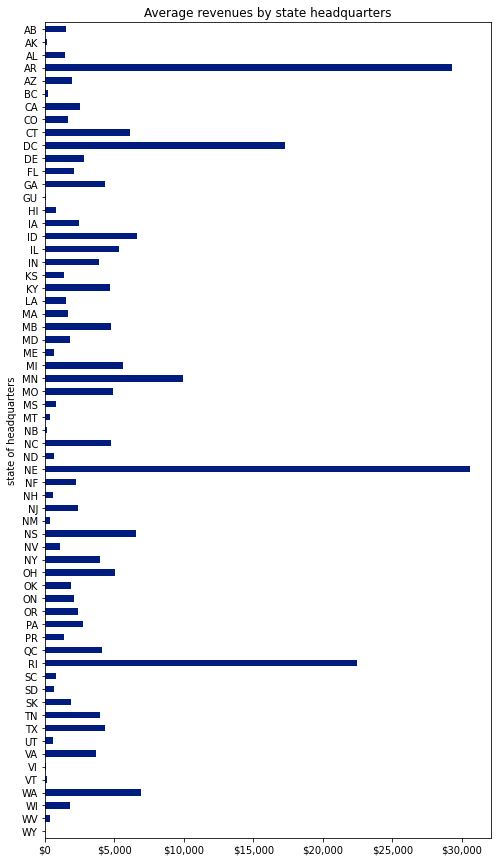

In [12]:
grpmean = df.groupby(by = 'state')['revt'].mean()
print(grpmean)

fig, ax = plt.subplots(1,1,figsize=(8,15))

grpmean.plot.barh(title='Average revenues by state headquarters',
                  xlabel = 'state of headquarters')

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.invert_yaxis()
ax.xaxis.set_major_formatter(tick)
plt.show()